In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.datasets import load_iris

In [7]:
dataset = load_iris()

In [8]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
import seaborn as sns

In [10]:
df = sns.load_dataset('iris')

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [12]:
X = df.iloc[:,:-1]
y = dataset.target

In [13]:
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [14]:
# 1. train test split
from sklearn.model_selection import train_test_split

In [15]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.33 , random_state=42)

In [16]:
# 2. decision tree
from sklearn.tree import DecisionTreeClassifier

In [17]:
# 3. post pruning
treeclassifier = DecisionTreeClassifier()

In [18]:
treeclassifier.fit(X_train , y_train)

DecisionTreeClassifier()

In [19]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


[Text(0.5416666666666666, 0.9285714285714286, 'X[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'X[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4166666666666667, 0.6428571428571429, 'X[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= 4.95\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'X[3] <= 1.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.35714285714285715, 'X[2] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.4166666666666667, 0.21428571428571427, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.58

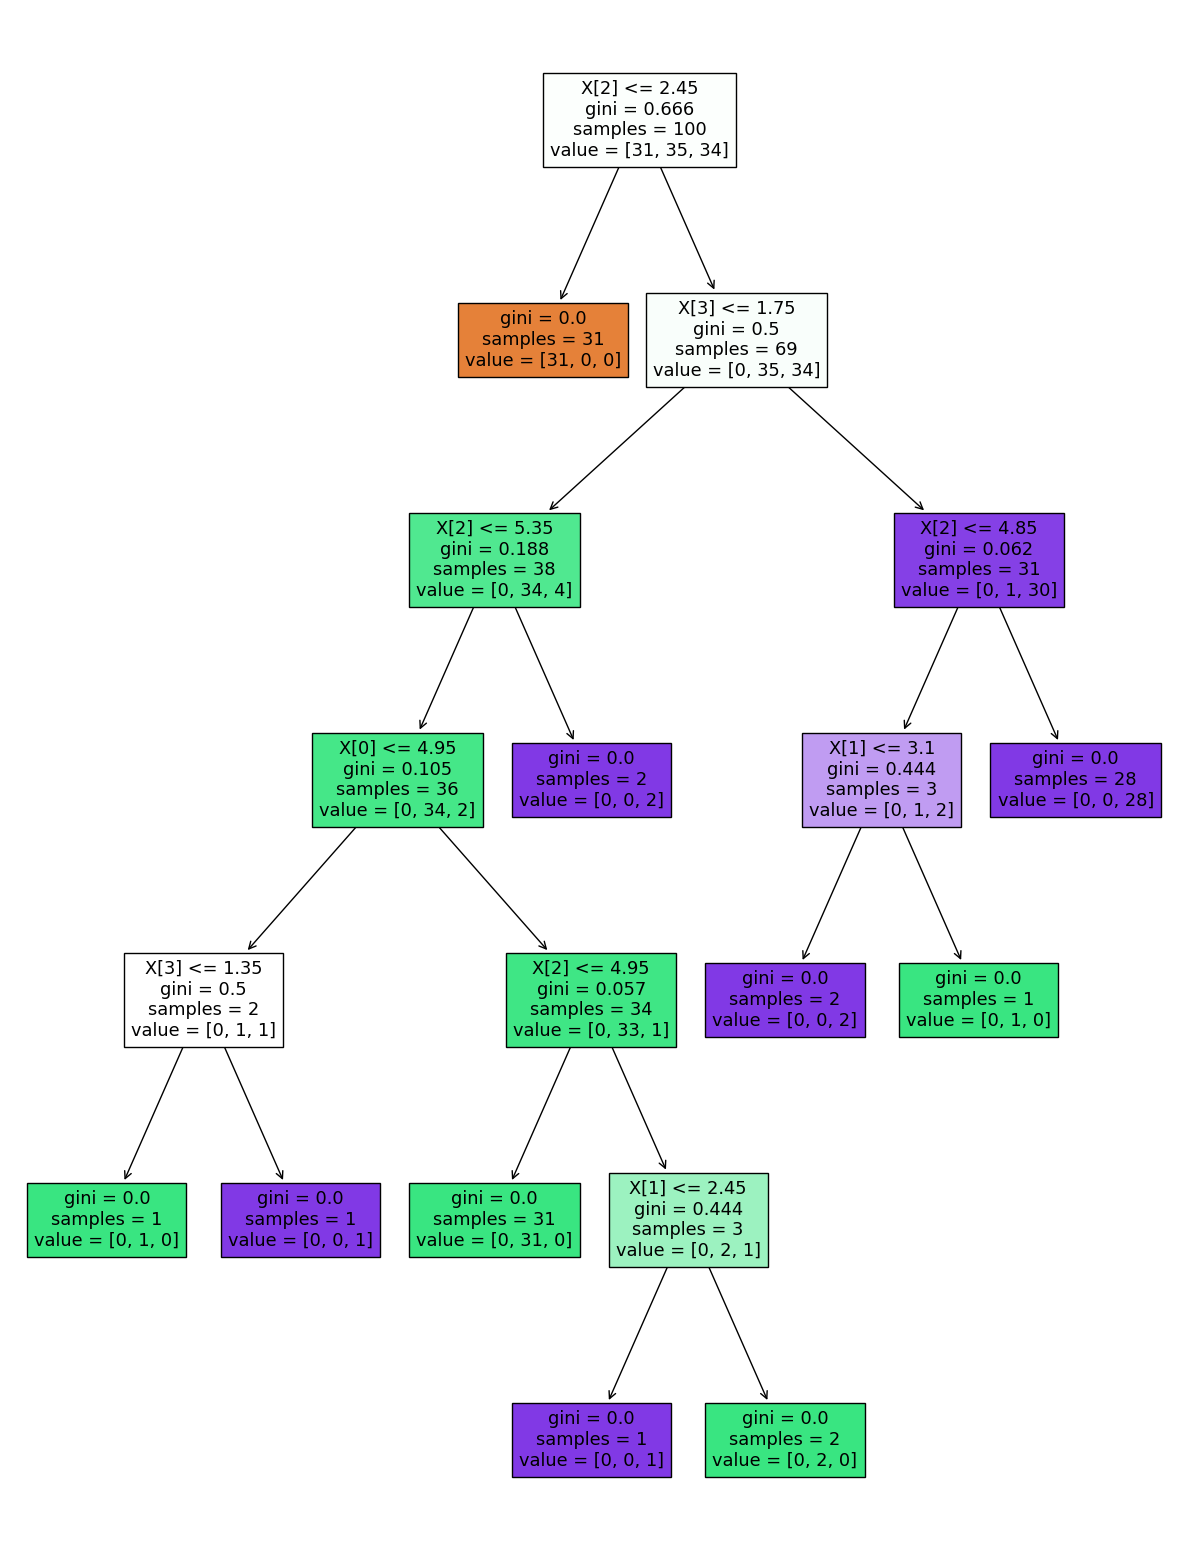

In [20]:
from sklearn import tree
plt.figure(figsize = (15,20))
tree.plot_tree(treeclassifier , filled = True)

In [21]:
treeclassifier = DecisionTreeClassifier(criterion='entropy' , max_depth=2)

In [22]:
treeclassifier.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'X[3] <= 0.8\nentropy = 1.583\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.485\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.206\nsamples = 31\nvalue = [0, 1, 30]')]

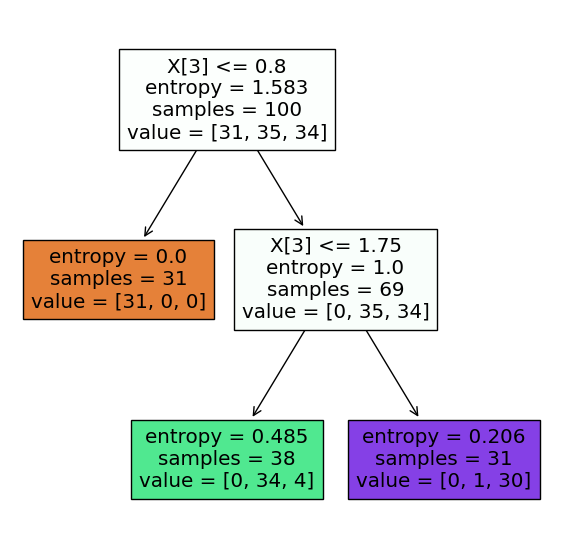

In [23]:
from sklearn import tree
plt.figure(figsize=(7,7))
tree.plot_tree(treeclassifier , filled = True)

In [24]:
# 5. predictions
y_pred = treeclassifier.predict(X_test)

In [25]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [26]:
from sklearn.metrics import accuracy_score , classification_report 

In [27]:
score = accuracy_score(y_pred , y_test)
score

0.98

In [28]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.94      0.97        16
           2       0.94      1.00      0.97        15

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [29]:
# INTERNAL ASSIGNMENT

In [30]:
from sklearn.datasets import load_breast_cancer

In [31]:
dataset = load_breast_cancer()

In [32]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [33]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [34]:
pd.DataFrame(dataset.data)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [35]:
X = pd.DataFrame(dataset.data)
y = dataset.target

In [36]:
X , y

(        0      1       2       3        4        5        6        7       8   \
 0    17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010  0.14710  0.2419   
 1    20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690  0.07017  0.1812   
 2    19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740  0.12790  0.2069   
 3    11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140  0.10520  0.2597   
 4    20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800  0.10430  0.1809   
 ..     ...    ...     ...     ...      ...      ...      ...      ...     ...   
 564  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390  0.13890  0.1726   
 565  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400  0.09791  0.1752   
 566  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251  0.05302  0.1590   
 567  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140  0.15200  0.2397   
 568   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000  0.00000  0.1587   
 
           9  

In [37]:
y.shape

(569,)

In [38]:
X.shape

(569, 30)

In [39]:
# 1. Train test split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.33 , random_state=42)

In [40]:
# 2. Making model
from sklearn.tree import DecisionTreeClassifier
treeclassifier = DecisionTreeClassifier()
treeclassifier.fit(X_train , y_train)

DecisionTreeClassifier()

[Text(0.5384615384615384, 0.9375, 'X[7] <= 0.051\ngini = 0.471\nsamples = 381\nvalue = [145, 236]'),
 Text(0.36538461538461536, 0.8125, 'X[20] <= 16.83\ngini = 0.098\nsamples = 233\nvalue = [12, 221]'),
 Text(0.2692307692307692, 0.6875, 'X[13] <= 48.7\ngini = 0.045\nsamples = 219\nvalue = [5, 214]'),
 Text(0.19230769230769232, 0.5625, 'X[24] <= 0.178\ngini = 0.027\nsamples = 216\nvalue = [3, 213]'),
 Text(0.15384615384615385, 0.4375, 'X[14] <= 0.003\ngini = 0.018\nsamples = 215\nvalue = [2, 213]'),
 Text(0.07692307692307693, 0.3125, 'X[1] <= 19.61\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.038461538461538464, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.11538461538461539, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23076923076923078, 0.3125, 'X[21] <= 33.35\ngini = 0.009\nsamples = 211\nvalue = [1, 210]'),
 Text(0.19230769230769232, 0.1875, 'gini = 0.0\nsamples = 199\nvalue = [0, 199]'),
 Text(0.2692307692307692, 0.1875, 'X[21] <= 34.5\ngini = 

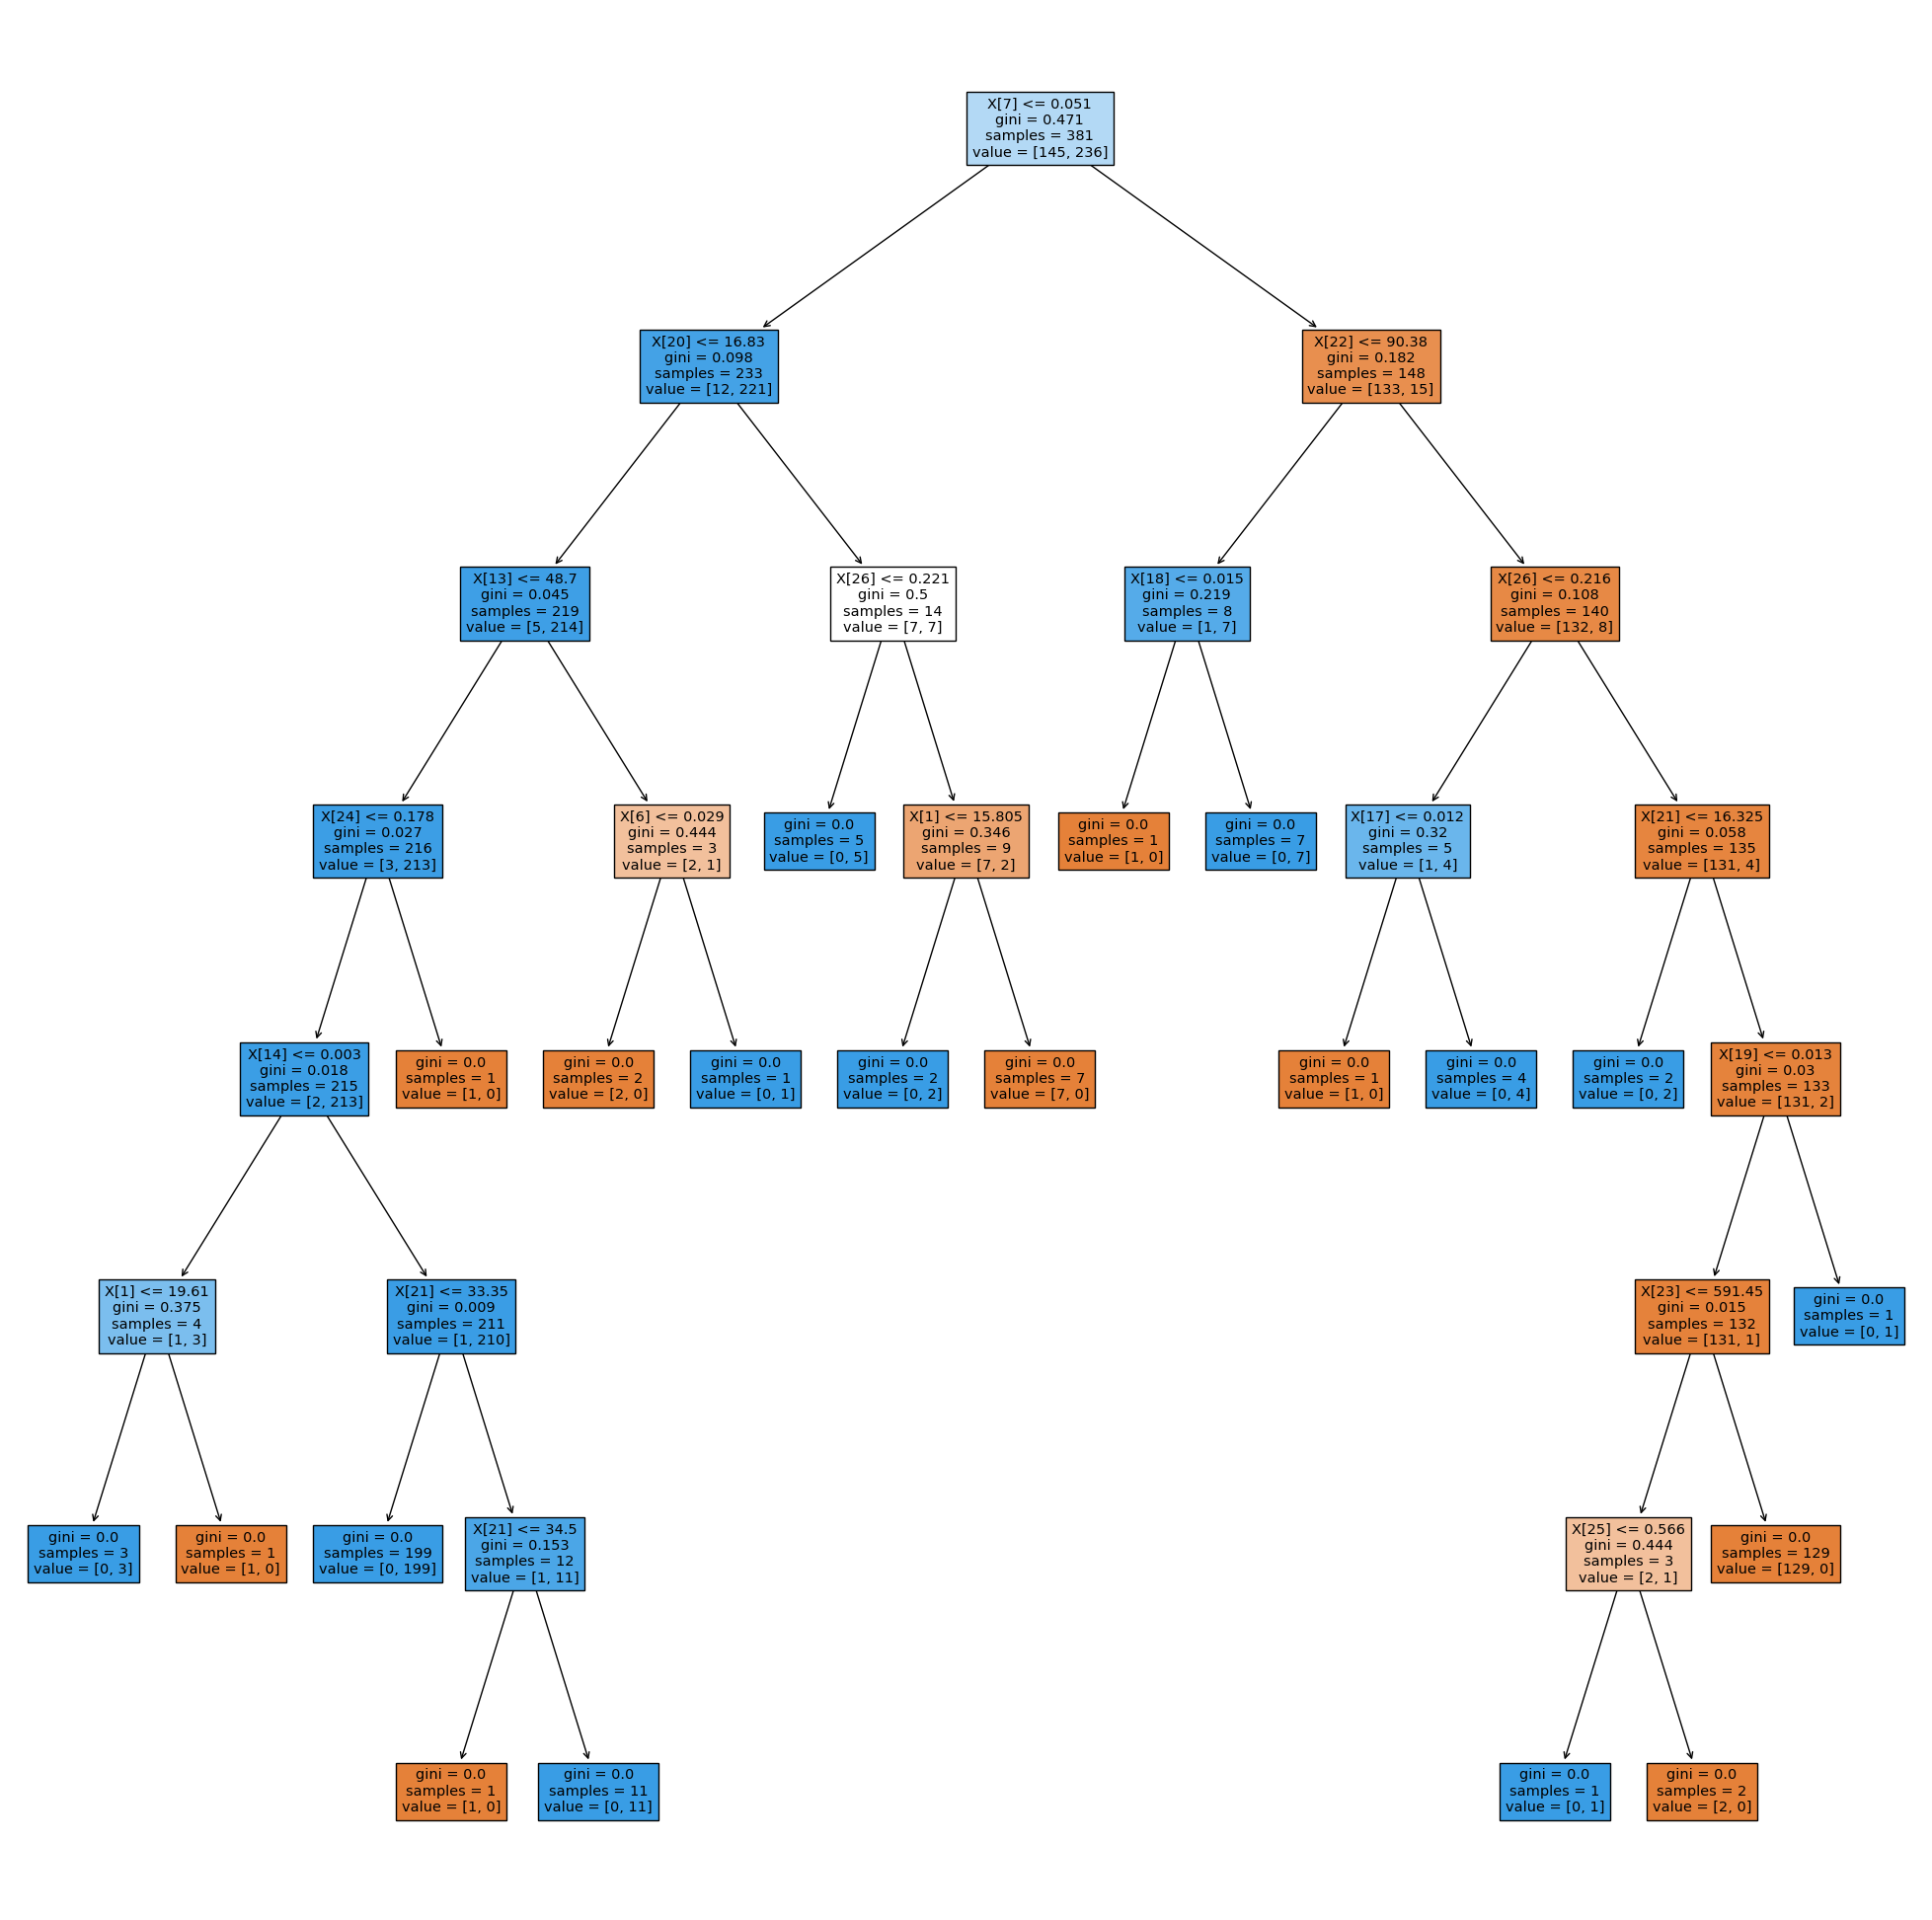

In [41]:
# 3. Making tree
from sklearn import tree
plt.figure(figsize = (25,25))
tree.plot_tree(treeclassifier , filled = True)

[Text(0.5, 0.8333333333333334, 'X[7] <= 0.051\ngini = 0.471\nsamples = 381\nvalue = [145, 236]'),
 Text(0.25, 0.5, 'X[20] <= 16.83\ngini = 0.098\nsamples = 233\nvalue = [12, 221]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.045\nsamples = 219\nvalue = [5, 214]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 14\nvalue = [7, 7]'),
 Text(0.75, 0.5, 'X[22] <= 90.38\ngini = 0.182\nsamples = 148\nvalue = [133, 15]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.108\nsamples = 140\nvalue = [132, 8]')]

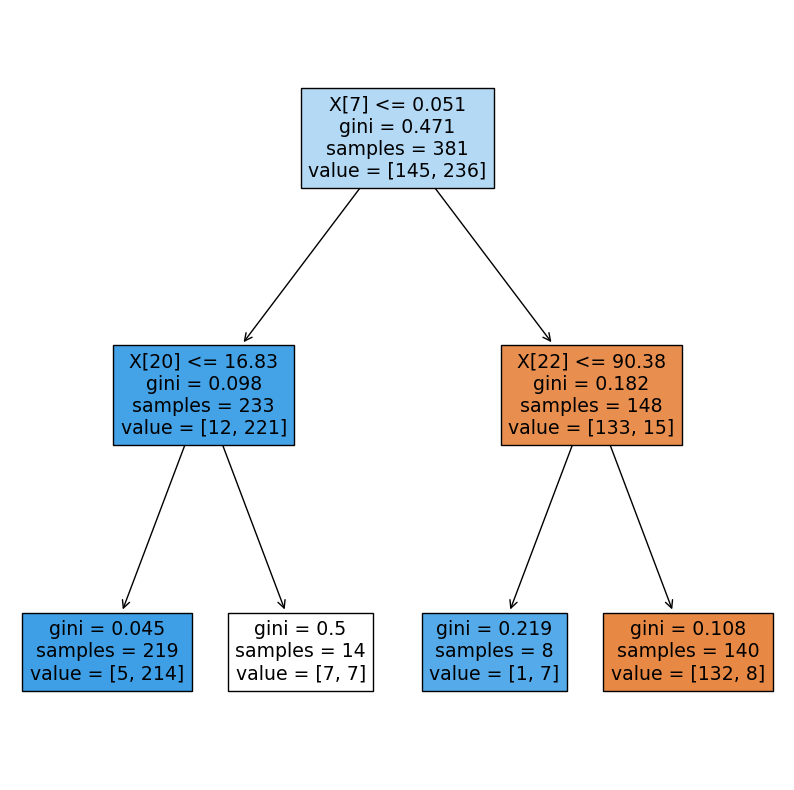

In [42]:
# 4. Making tree more shorter using Post Pruning Method
from sklearn.tree import DecisionTreeClassifier
treeclassifier = DecisionTreeClassifier(criterion='gini' , max_depth=2)
treeclassifier.fit(X_train , y_train)

from sklearn import tree
plt.figure(figsize = (10,10))
tree.plot_tree(treeclassifier , filled = True)

In [43]:
# 5. Predictions
y_pred = treeclassifier.predict(X_test)

In [44]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1])

In [45]:
from sklearn.metrics import accuracy_score , classification_report

In [46]:
accuracy_score(y_pred , y_test)

0.925531914893617

In [47]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90        77
           1       0.90      0.98      0.94       111

    accuracy                           0.93       188
   macro avg       0.94      0.91      0.92       188
weighted avg       0.93      0.93      0.92       188



In [48]:
# 6. DecisionTree Prepruning And Hyperparameter Tuning For Huge Data
import warnings
warnings.filterwarnings('ignore')

In [49]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2'] 
}

In [50]:
# hyper parater tuning
from sklearn.model_selection import GridSearchCV

In [52]:
treeclassifier = DecisionTreeClassifier()
clf = GridSearchCV(treeclassifier , param_grid=parameter , cv = 5 , scoring = 'accuracy')

In [54]:
# train data
clf.fit(X_train , y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [55]:
clf.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'splitter': 'best'}

In [56]:
y_pred = clf.predict(X_test)

In [57]:
score=accuracy_score(y_pred,y_test)

In [58]:
score

0.9095744680851063

In [59]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88        74
           1       0.90      0.96      0.93       114

    accuracy                           0.91       188
   macro avg       0.91      0.90      0.90       188
weighted avg       0.91      0.91      0.91       188

